# Import Libraries

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pwd = os.getcwd()

# Import Data

In [4]:
data = pd.read_csv(pwd + '//SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Cleaning Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
print ('Data duplicated: ', data.duplicated().sum())

Data duplicated:  17


In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data['Postal Code'] = data['Postal Code'].astype('object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   object 
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


# Data Correlation

In [10]:
corr_data = data[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
corr_data

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


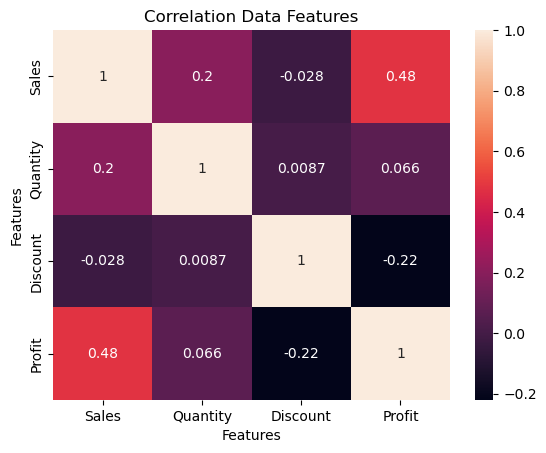

In [11]:
sns.heatmap(data=corr_data, annot=True)
plt.title('Correlation Data Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

# EDA
## Analysing the different kinds of Shipping Modes, Segment and Category
### Shipping Modes

In [12]:
data['Ship Mode'].value_counts()

Ship Mode
Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: count, dtype: int64

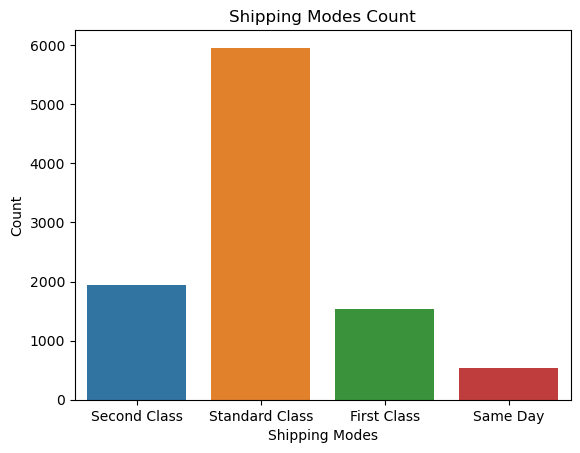

In [13]:
sns.countplot(x=data['Ship Mode'])
plt.title('Shipping Modes Count')
plt.xlabel('Shipping Modes')
plt.ylabel('Count')
plt.show()

### Segment

In [14]:
data['Segment'].value_counts()

Segment
Consumer       5183
Corporate      3015
Home Office    1779
Name: count, dtype: int64

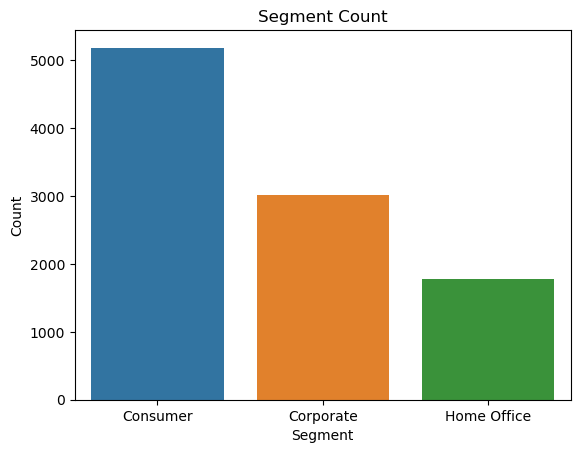

In [15]:
sns.countplot(x=data['Segment'])
plt.title('Segment Count')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

### Categories

In [16]:
data['Category'].value_counts()

Category
Office Supplies    6012
Furniture          2118
Technology         1847
Name: count, dtype: int64

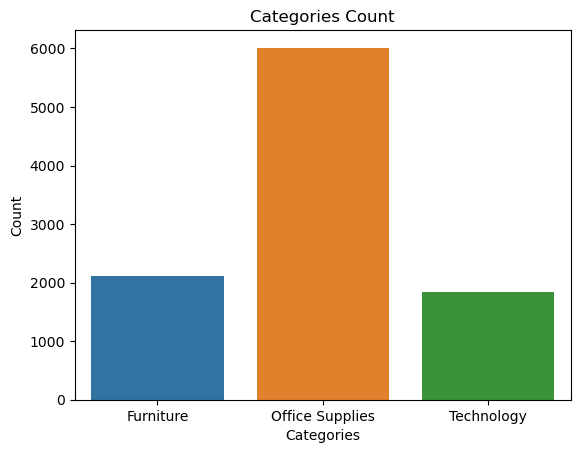

In [17]:
sns.countplot(x=data['Category'])
plt.title('Categories Count')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

### Sub-Categories

In [18]:
data['Sub-Category'].value_counts()

Sub-Category
Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

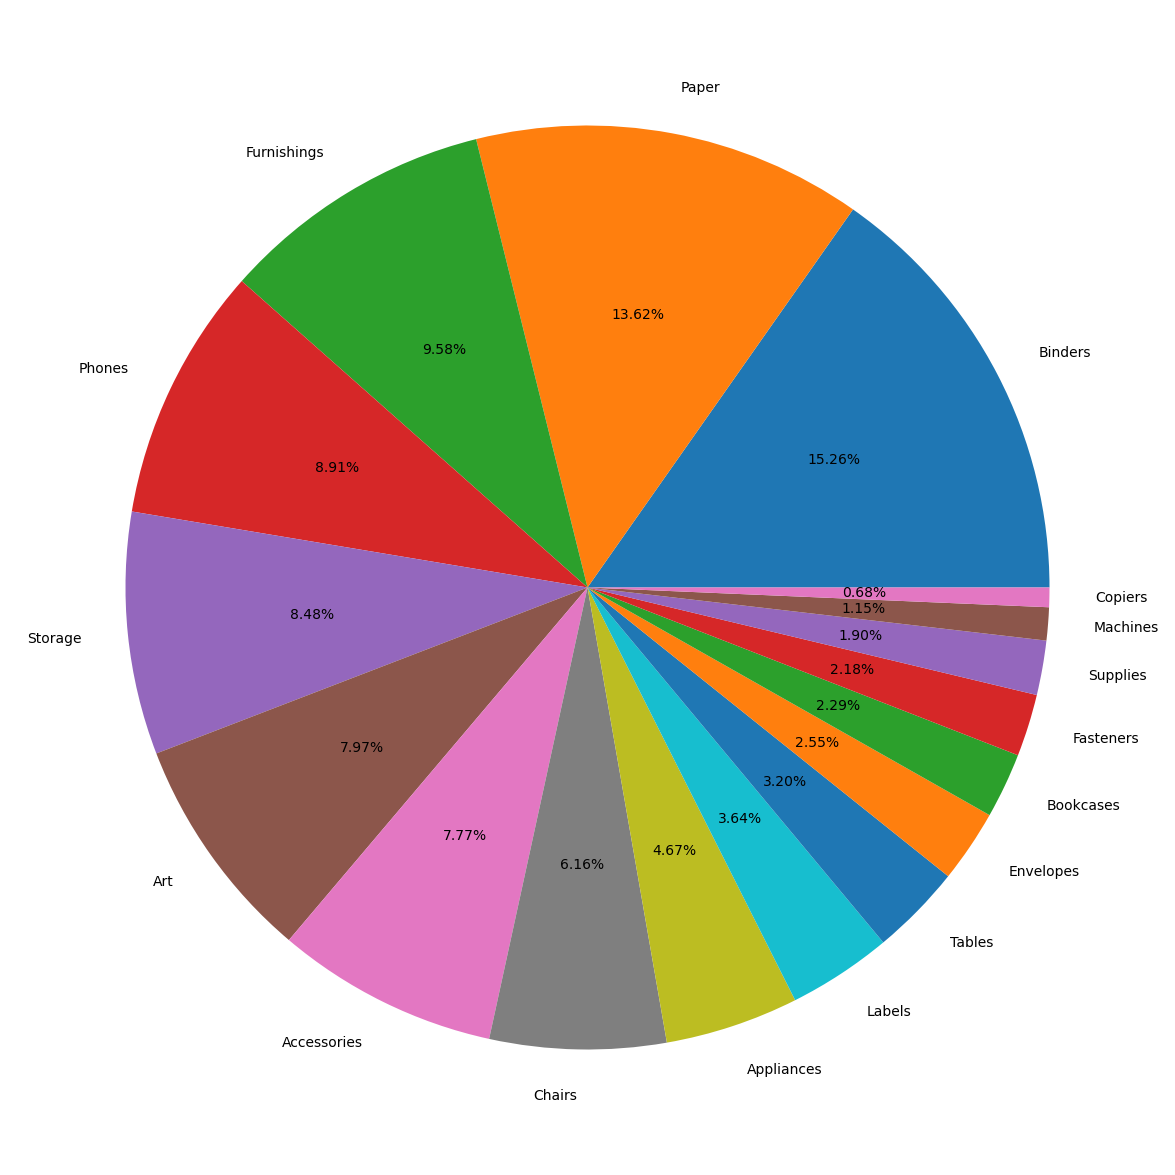

In [19]:
plt.figure(figsize=(15, 15))
plt.pie(data['Sub-Category'].value_counts(), labels=data['Sub-Category'].value_counts().index, autopct='%1.2f%%')
plt.show()

In [20]:
region_profit = data.groupby(['Region'])['Profit'].sum()
region_profit

Region
Central     39655.8752
East        91506.3092
South       46749.4303
West       108329.8079
Name: Profit, dtype: float64

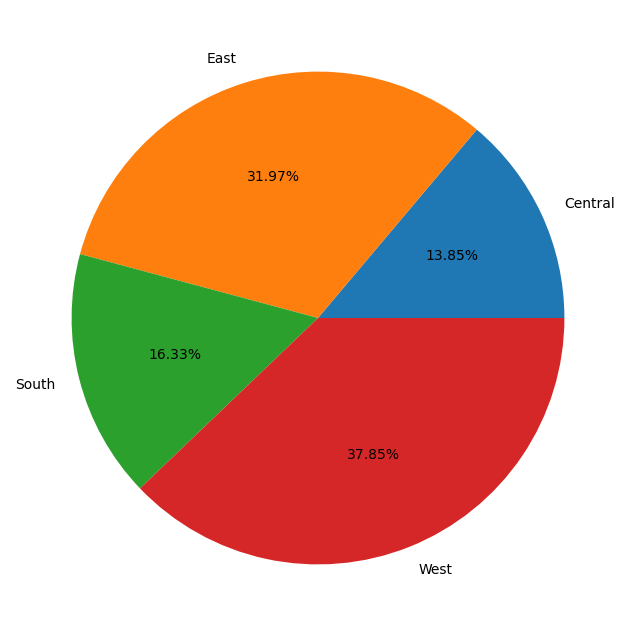

In [21]:
plt.figure(figsize=(15, 8))
plt.pie(region_profit, labels=region_profit.index, autopct='%1.2f%%')
plt.show()

In [22]:
region_sales = data.groupby(['Region'])['Sales'].sum()
region_sales

Region
Central    500782.8528
East       678435.1960
South      391721.9050
West       725255.6365
Name: Sales, dtype: float64

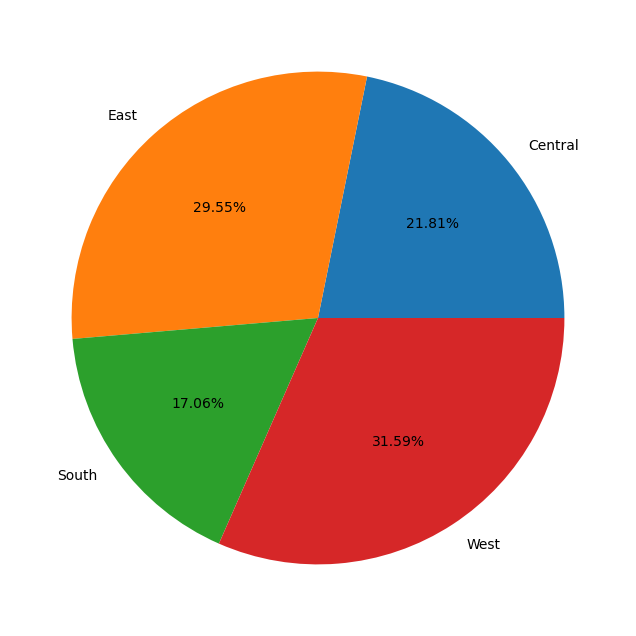

In [23]:
plt.figure(figsize=(15, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.2f%%')
plt.show()

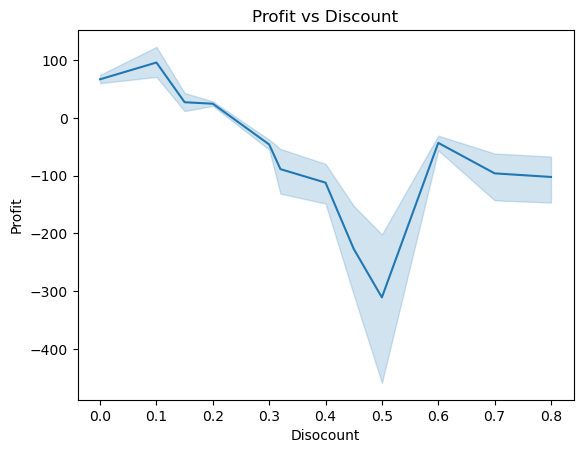

In [24]:
sns.lineplot(data=data, x="Discount", y="Profit")
plt.title('Profit vs Discount')
plt.xlabel('Disocount')
plt.ylabel('Profit')
plt.show()

So we can see, when discount is increases, profit will be decreases

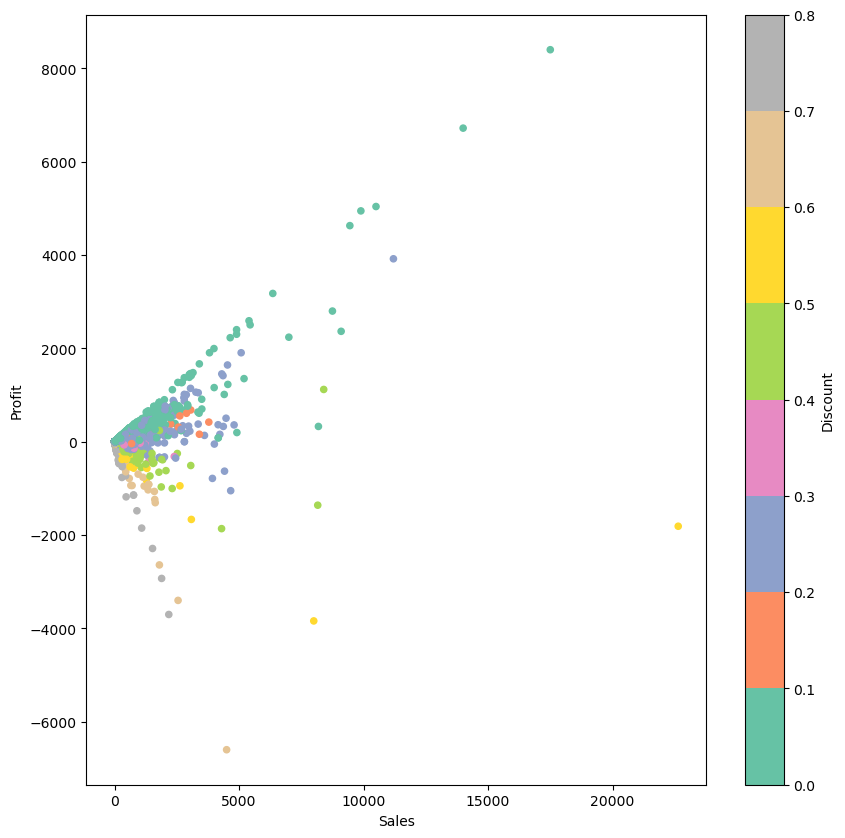

In [25]:
data.plot(kind="scatter", x="Sales", y="Profit", c="Discount", colormap="Set2", figsize=(10, 10))
plt.show()

From the scatter plot above, we can clearly see that more sales doesn't mean more profit. It depends on discont as well. When Sales is high and there is low discount, the profit margin is higher.

In [27]:
region_data = data.groupby(['Region'])[['Profit', 'Sales']].sum().sort_values('Profit', ascending=False)
region_data

,Profit,Sales
Region,,
West,108329.8079,725255.6365
East,91506.3092,678435.1960
South,46749.4303,391721.9050
Central,39655.8752,500782.8528


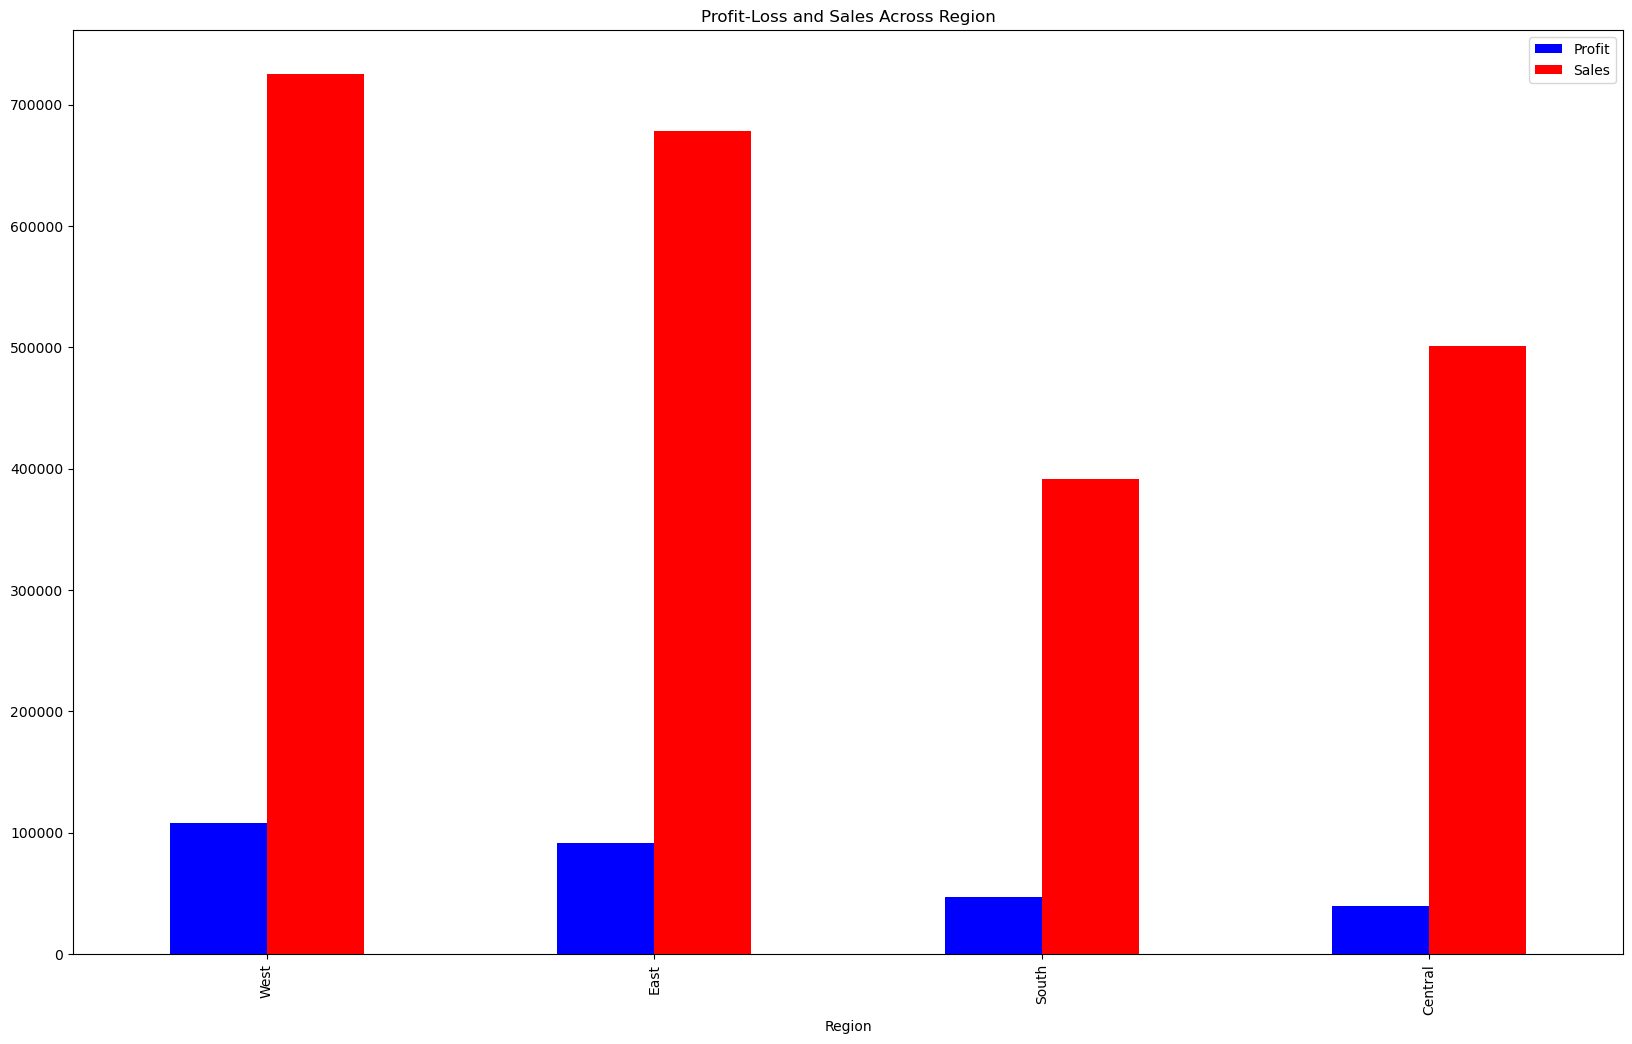

In [28]:
region_data[:].plot.bar(color=('Blue', 'Red'), figsize=(20, 12))
plt.title('Profit-Loss and Sales Across Region')
plt.show()

In [33]:
sub_cat_data = data.groupby(['Sub-Category'])[['Profit', 'Sales']].sum().sort_values('Sales', ascending=False)
sub_cat_data

,Profit,Sales
Sub-Category,,
Phones,44515.7306,330007.0540
Chairs,26567.1278,327777.7610
Storage,21278.8264,223843.6080
Tables,-17725.4811,206965.5320
Binders,30228.0003,203409.1690
Machines,3384.7569,189238.6310
Accessories,41936.6357,167380.3180
Copiers,55617.8249,149528.0300
Bookcases,-3472.5560,114879.9963


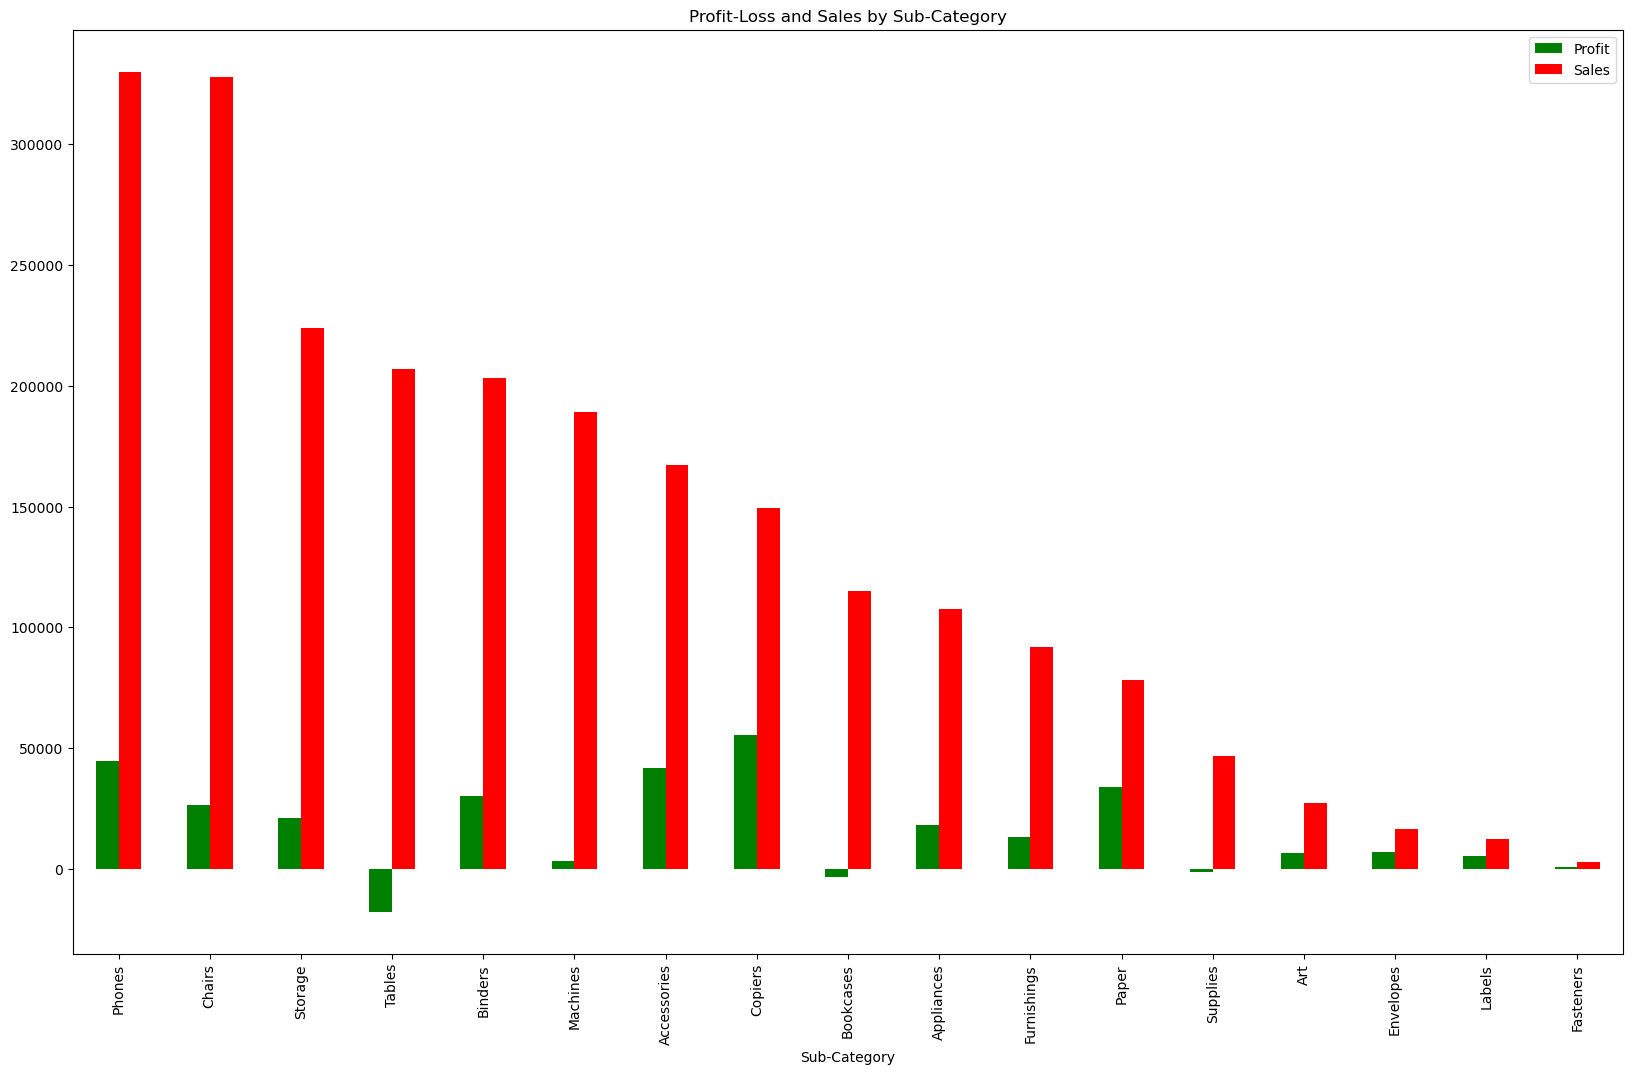

In [34]:
sub_cat_data[:].plot.bar(color=('Green', 'Red'), figsize=(20, 12))
plt.title('Profit-Loss and Sales by Sub-Category')
plt.show()

Altought table make pretty high in sales but it makes the biggest loss from all sub category

In [31]:
segment_data = data.groupby(['Segment'])[['Profit', 'Sales']].sum().sort_values('Profit', ascending=False)
segment_data

,Profit,Sales
Segment,,
Consumer,134007.4413,1.160833e+06
Corporate,91954.9798,7.060701e+05
Home Office,60279.0015,4.292927e+05


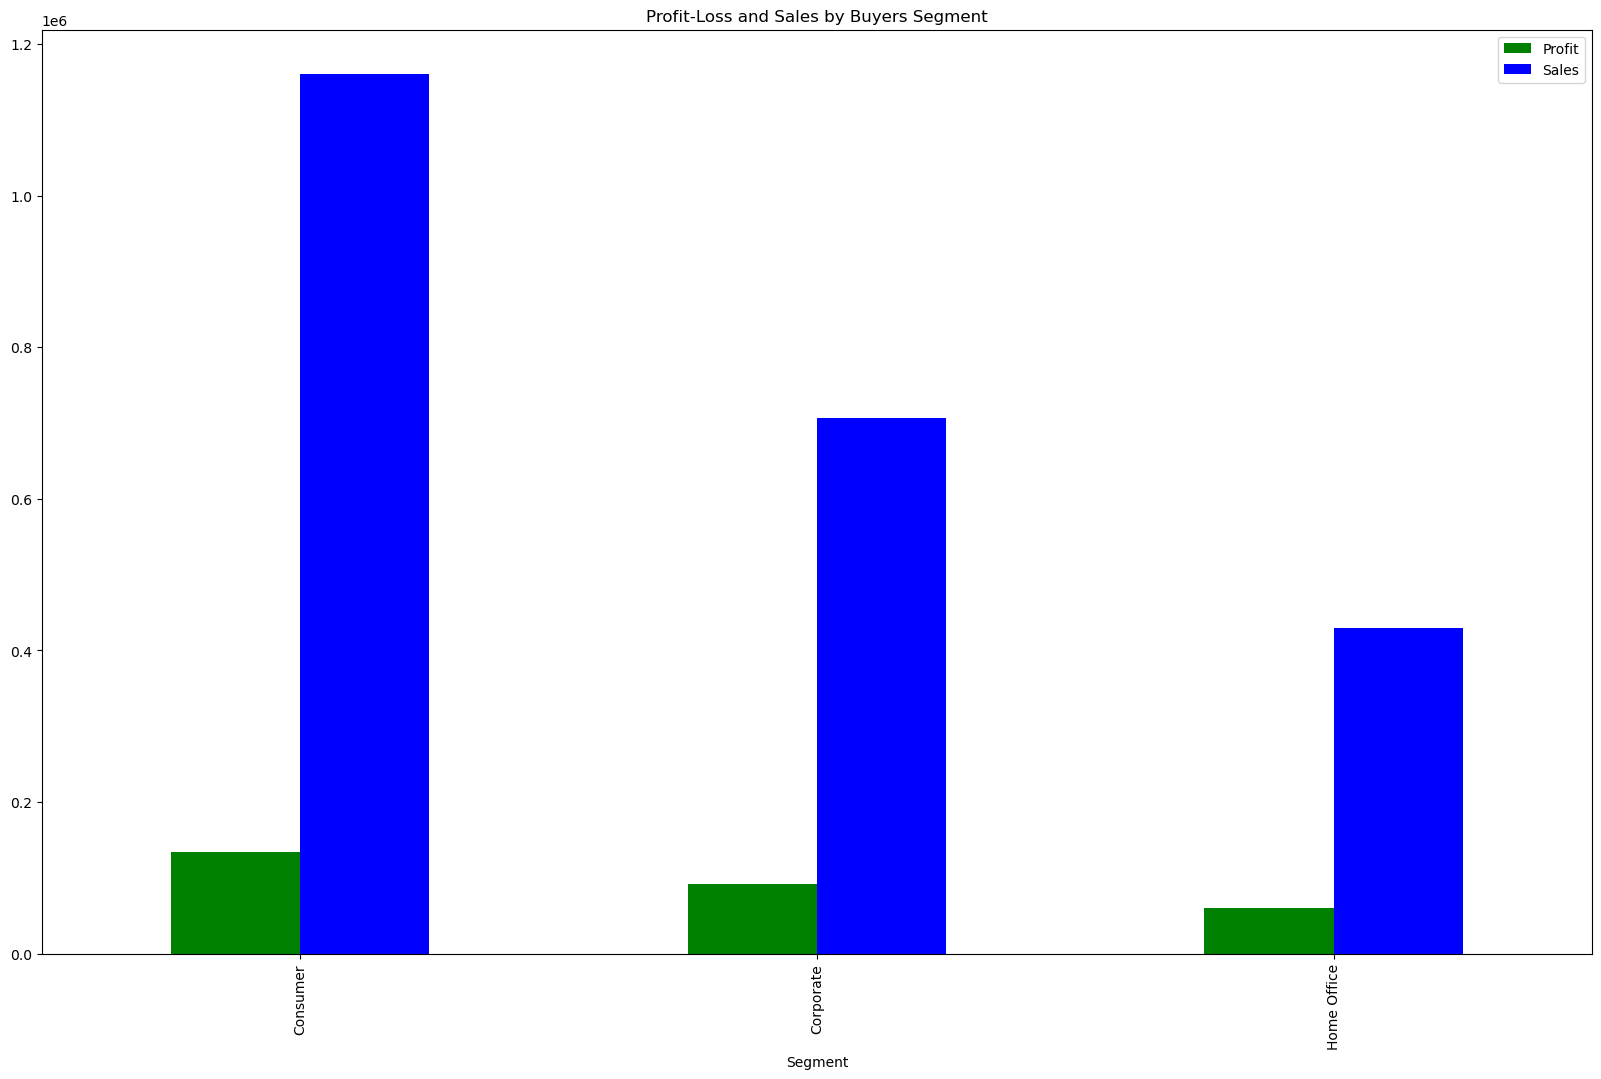

In [32]:
segment_data[:].plot.bar(color=('Green', 'Blue'), figsize=(20, 12))
plt.title('Profit-Loss and Sales by Buyers Segment')
plt.show()